In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [5]:
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid',palette='tab20')

<Axes: >

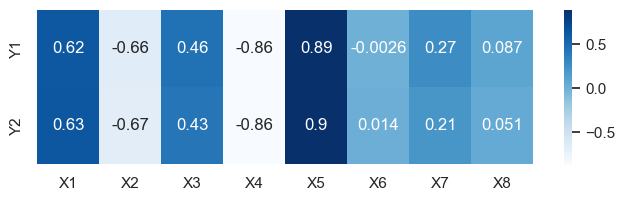

In [6]:
fig, ax = plt.subplots(figsize=(8,2))
sns.heatmap(df.corr().iloc[-2:,:8],annot=True,ax=ax,cmap="Blues")

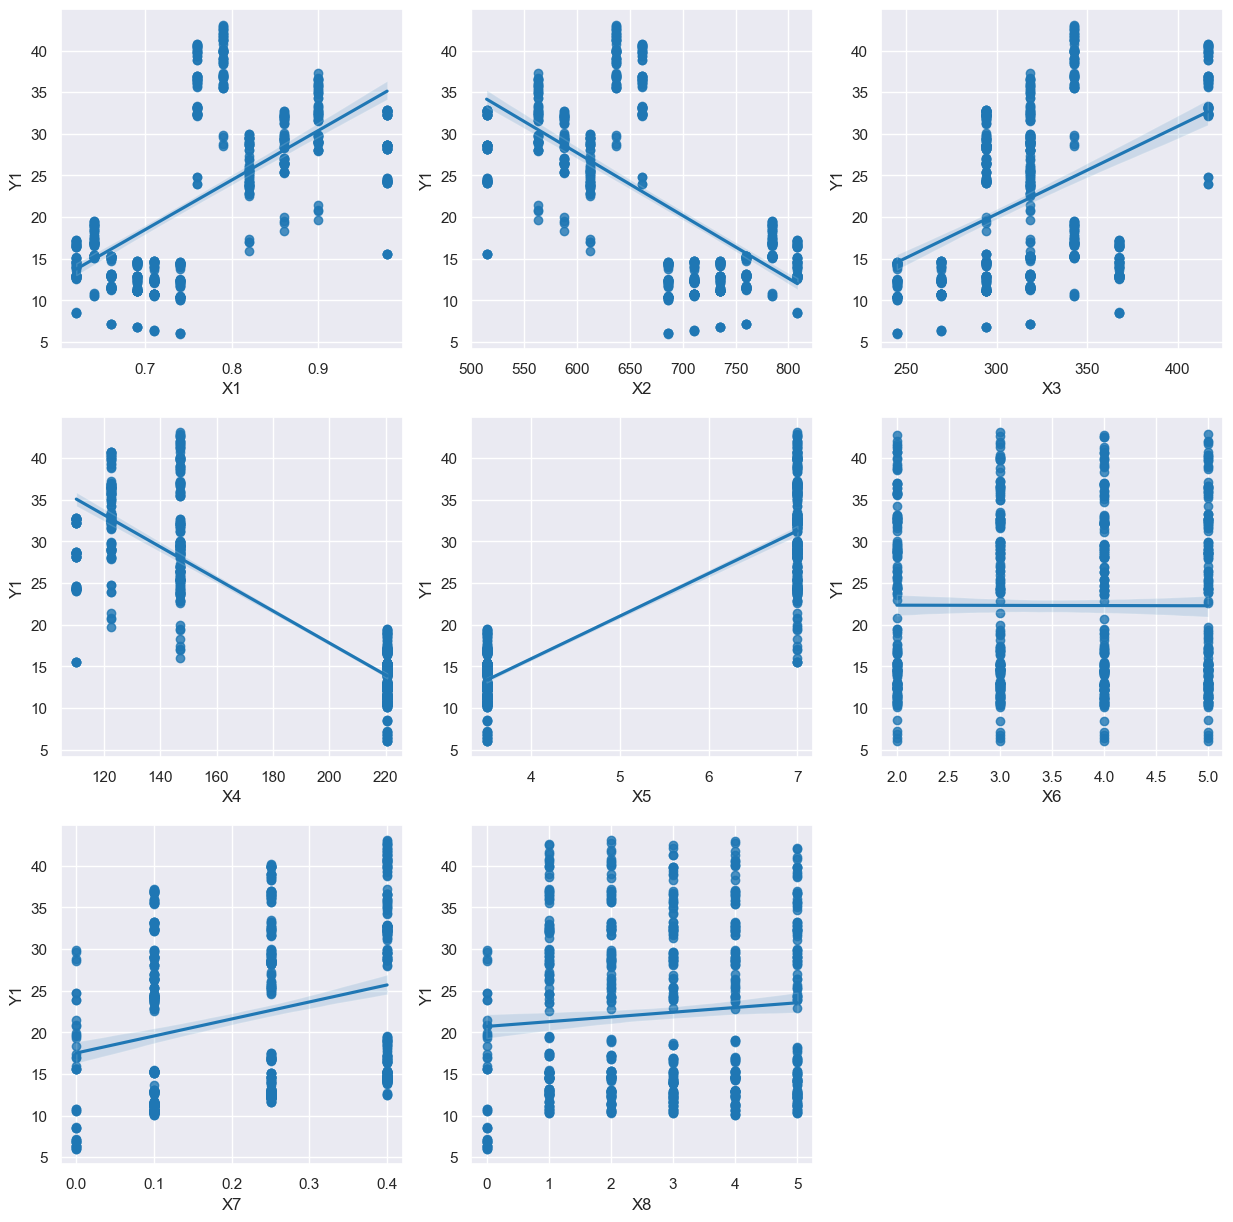

In [7]:
plt.figure(figsize=(15,15))
for i,col in enumerate(df.columns[:-2], start=1):
    plt.subplot(3, 3, i)
    sns.regplot(x=df[col], y="Y1", data=df)
plt.show()

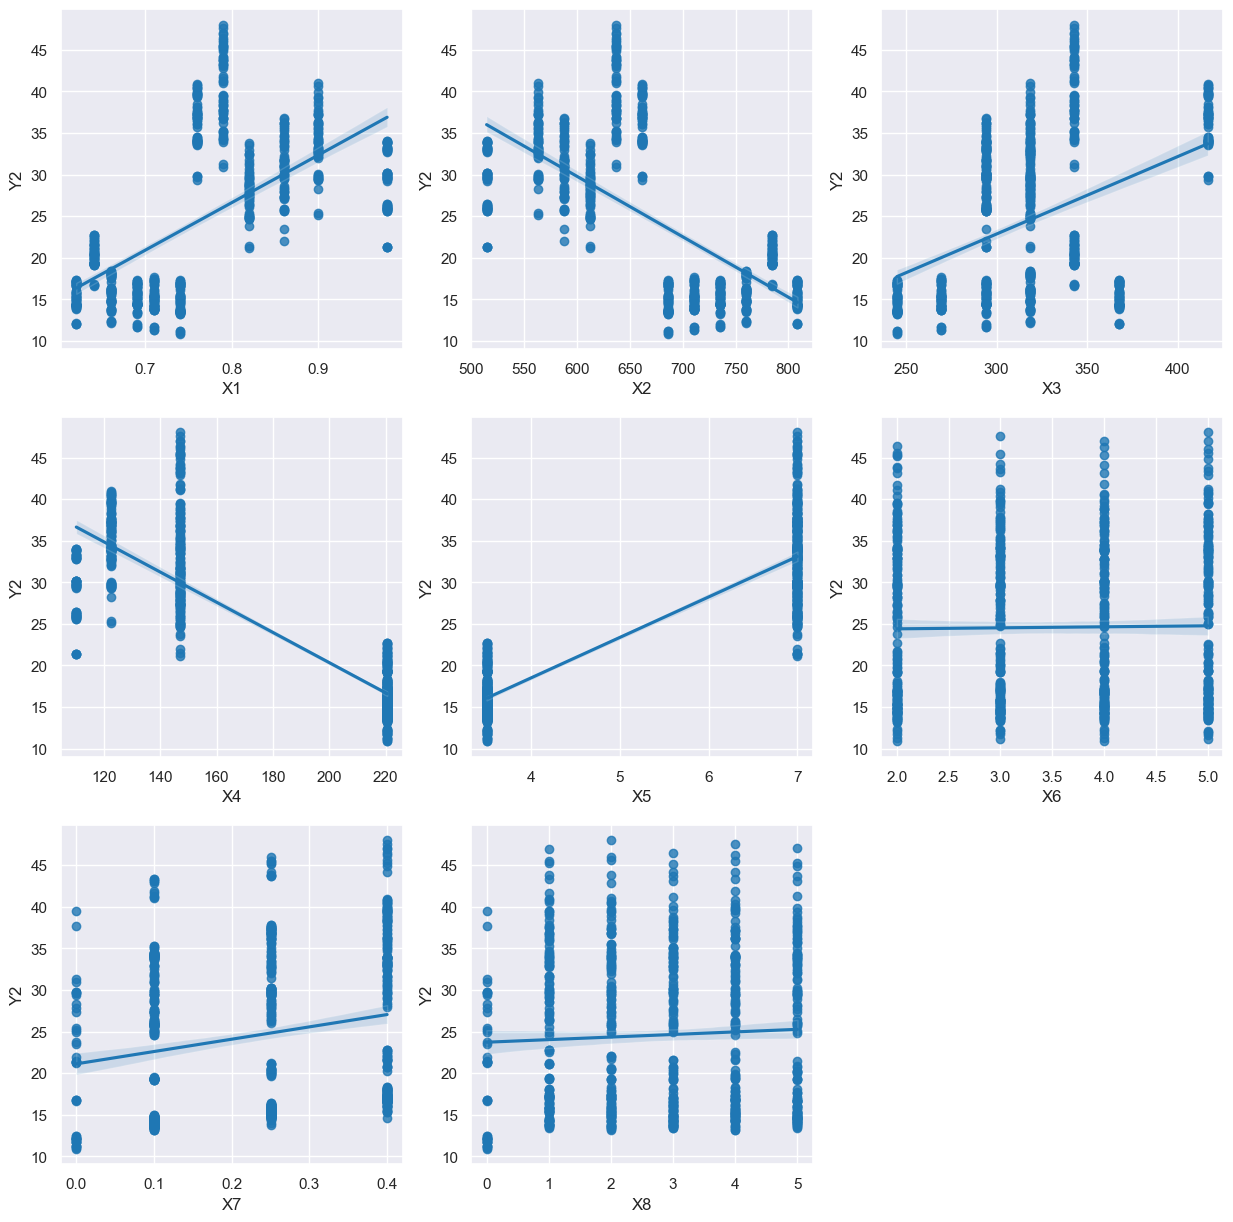

In [8]:
plt.figure(figsize=(15,15))
for i,col in enumerate(df.columns[:-2], start=1):
    plt.subplot(3, 3, i)
    sns.regplot(x=df[col], y="Y2", data=df)
plt.show()

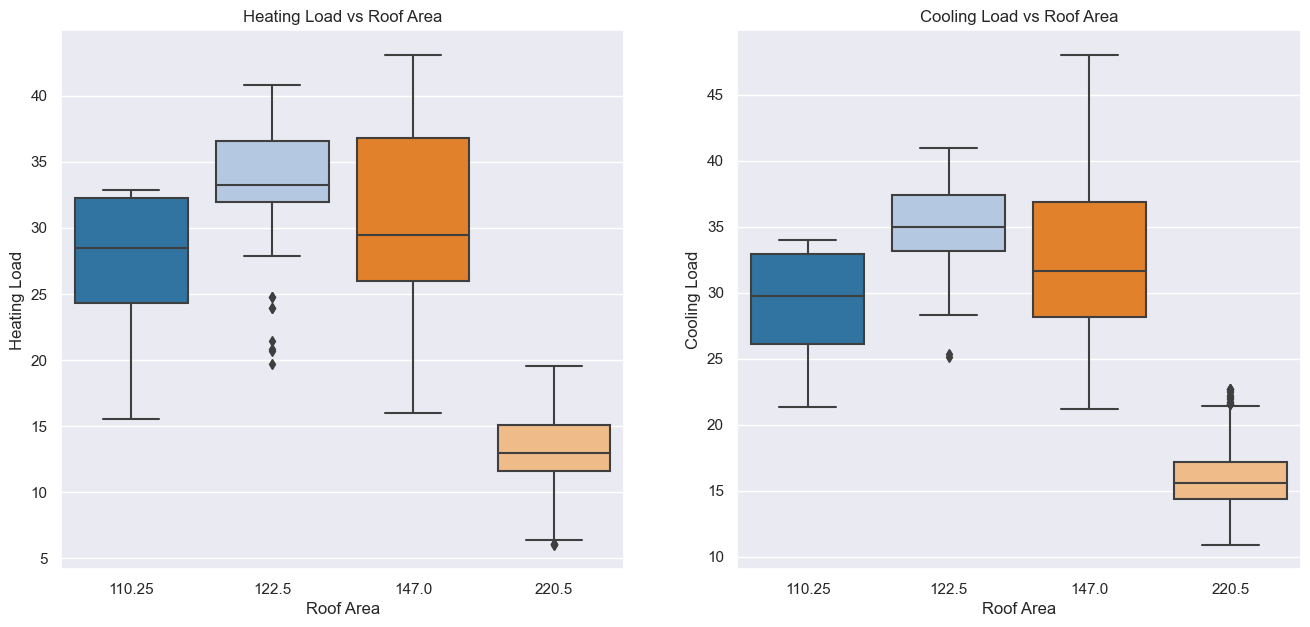

In [9]:
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.title('Heating Load vs Roof Area')
sns.boxplot(x = 'X4', y = 'Y1', data = df)
plt.xlabel('Roof Area')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.title('Cooling Load vs Roof Area')
sns.boxplot(x = 'X4', y = 'Y2', data = df)
plt.xlabel('Roof Area')
plt.ylabel('Cooling Load')
plt.show()

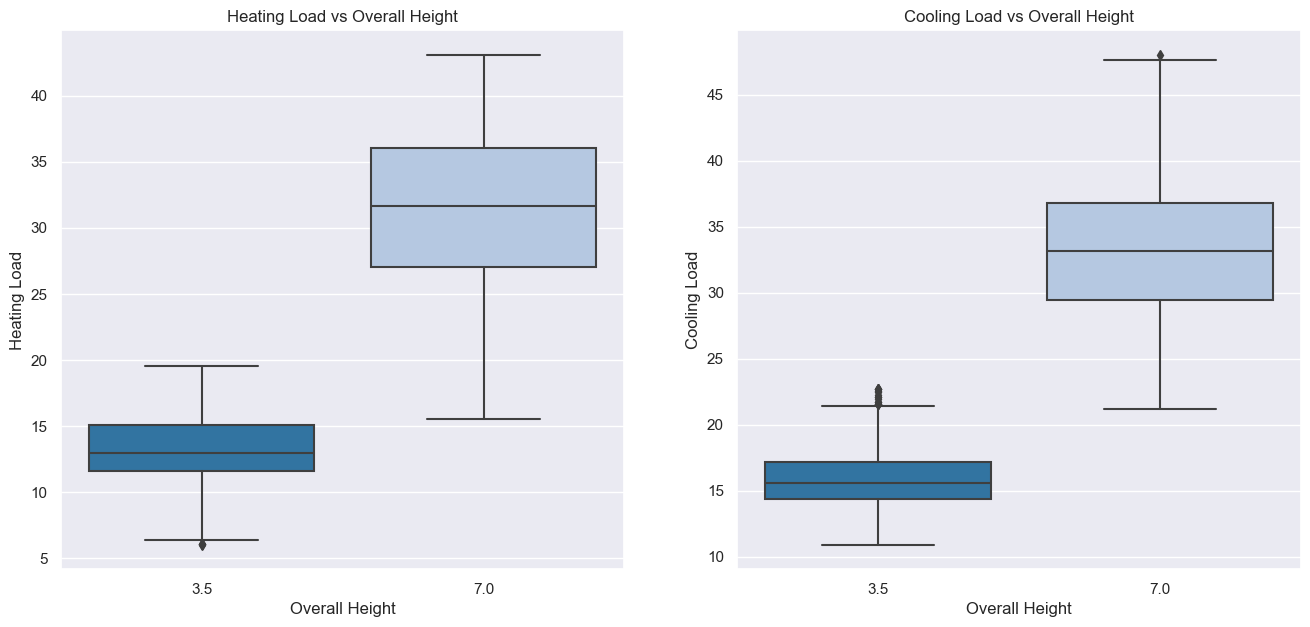

In [10]:
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.title('Heating Load vs Overall Height')
sns.boxplot(x = 'X5', y = 'Y1', data = df)
plt.xlabel('Overall Height')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.title('Cooling Load vs Overall Height')
sns.boxplot(x = 'X5', y = 'Y2', data = df)
plt.xlabel('Overall Height')
plt.ylabel('Cooling Load')
plt.show()

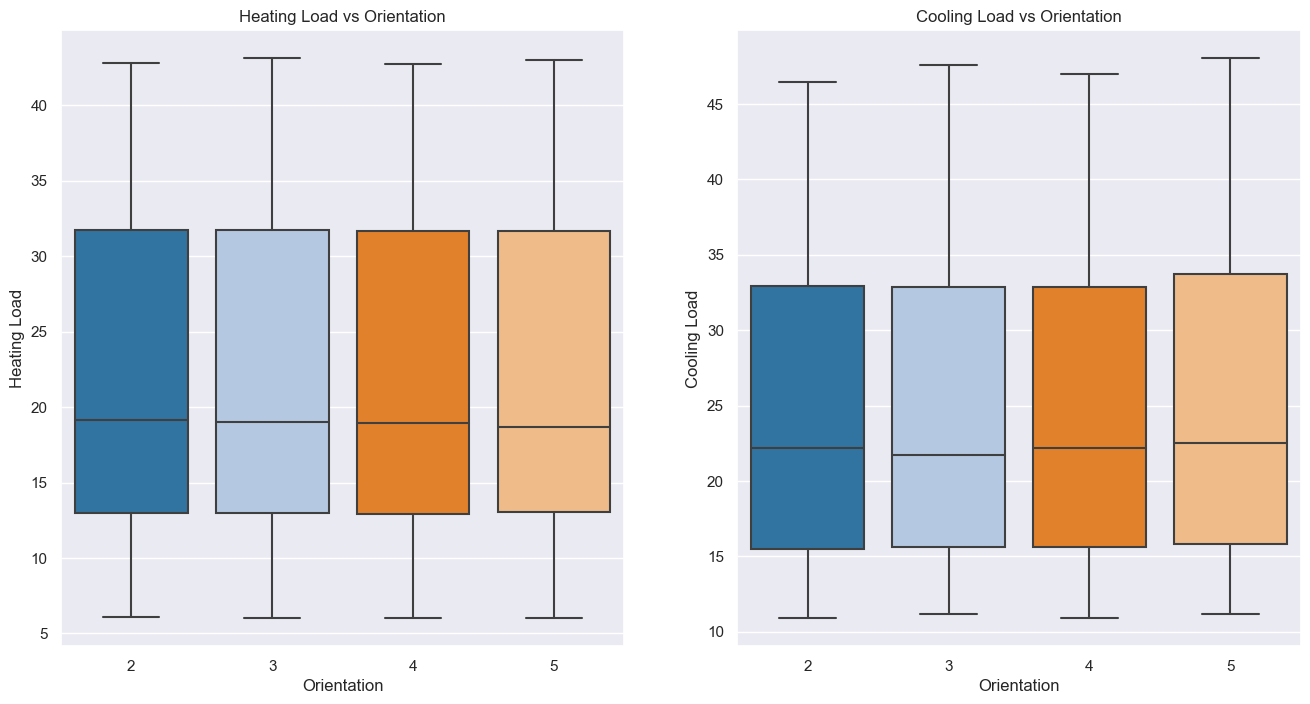

In [11]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Heating Load vs Orientation')
sns.boxplot(x = 'X6', y = 'Y1', data = df)
plt.xlabel('Orientation')
plt.ylabel('Heating Load')

plt.subplot(1,2,2)
plt.title('Cooling Load vs Orientation')
sns.boxplot(x = 'X6', y = 'Y2', data = df)
plt.xlabel('Orientation')
plt.ylabel('Cooling Load')
plt.show()

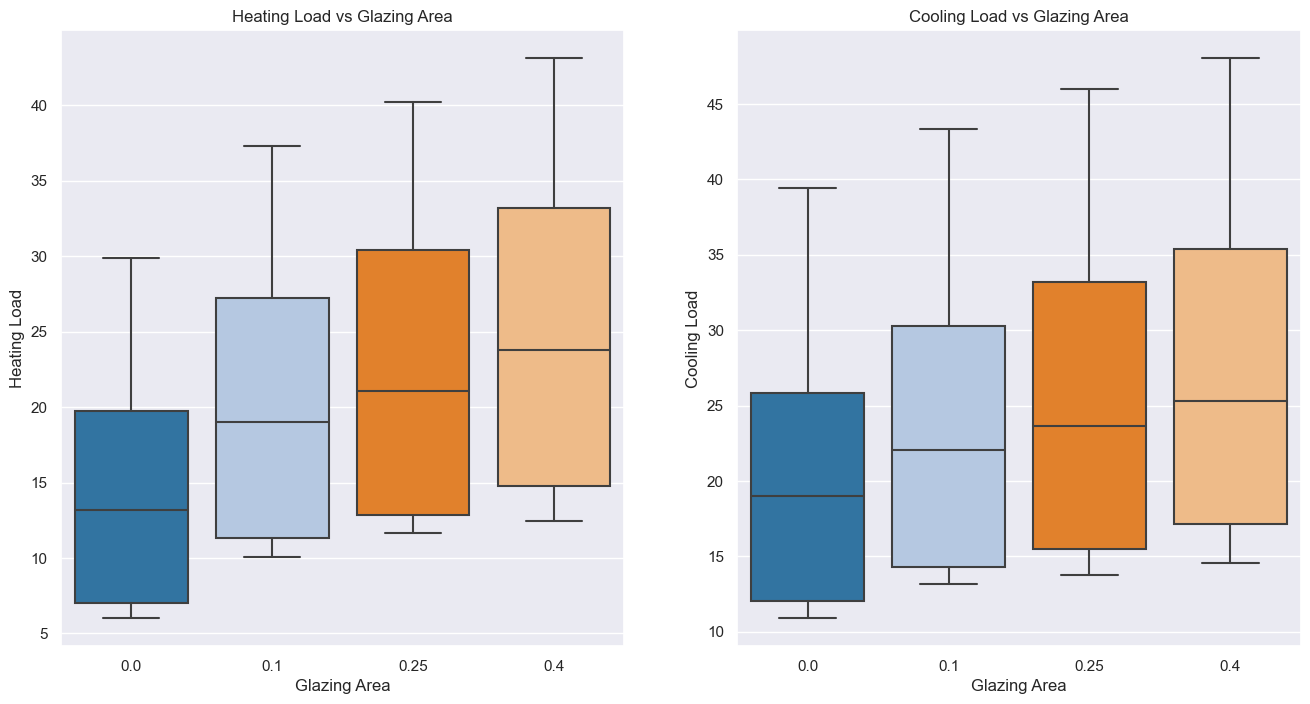

In [12]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Heating Load vs Glazing Area')
sns.boxplot(x = 'X7', y = 'Y1', data =df)
plt.xlabel('Glazing Area')
plt.ylabel('Heating Load')

plt.subplot(1,2,2)
plt.title('Cooling Load vs Glazing Area')
sns.boxplot(x = 'X7', y = 'Y2', data = df)
plt.xlabel('Glazing Area')
plt.ylabel('Cooling Load')
plt.show()

<Axes: title={'center': 'Box plot before scaling'}>

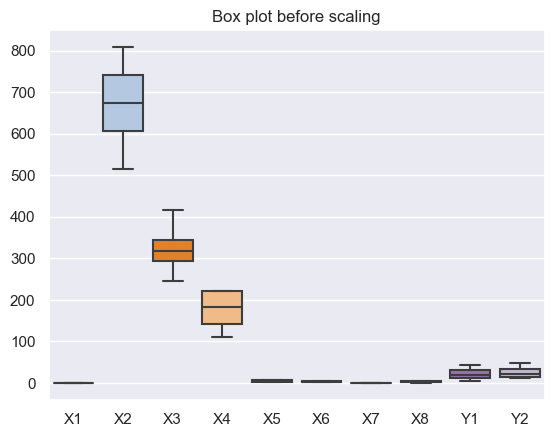

In [13]:
plt.title('Box plot before scaling')
sns.boxplot(df)

In [14]:
scaler = StandardScaler()
df.iloc[:,:8] = pd.DataFrame(scaler.fit_transform(df.iloc[:, :8]), columns=df.columns[:8])

<Axes: title={'center': 'Box plot after scaling'}>

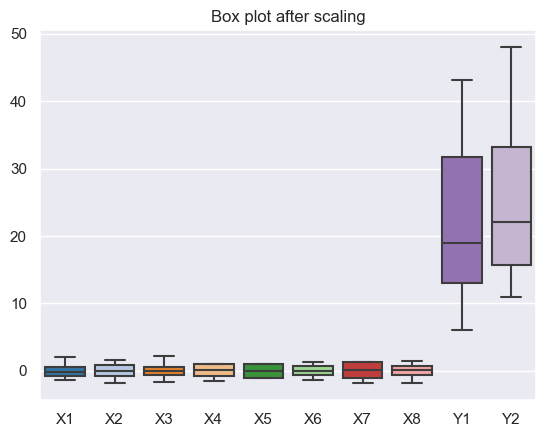

In [15]:
plt.title('Box plot after scaling')
sns.boxplot(df)

In [16]:
X=df.iloc[:, :-2]
y1 = df.iloc[:, -2]
y2 = df.iloc[:, -1]

In [17]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y1, test_size = 0.3, random_state = 4528)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, test_size = 0.3, random_state = 4528)

In [18]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [19]:
lr_heat = LinearRegression()
lr_heat.fit(X_train_1,y_train_1)
test_pred_heat = lr_heat.predict(X_test_1)
results_heat = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test_1, test_pred_heat)]], 
                          columns=['Heating Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

lr_cool = LinearRegression()
lr_cool.fit(X_train_2,y_train_2)
test_pred_cool = lr_cool.predict(X_test_2)
results_cool = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test_2, test_pred_cool)]], 
                          columns=['Cooling Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
print(results_heat,"\n") 
print(results_cool)

       Heating Model       MAE      MSE      RMSE  R2 Square
0  Linear Regression  1.979544  7.48544  2.735953   0.925638 

       Cooling Model       MAE       MSE      RMSE  R2 Square
0  Linear Regression  2.143858  9.514455  3.084551   0.892247


In [20]:
rf_heat = RandomForestRegressor(n_estimators = 100, random_state = 4528)
rf_heat.fit(X_train_1, y_train_1)
test_pred_heat = rf_heat.predict(X_test_1)
t1= pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test_1, test_pred_heat) ]], 
                            columns=['Heating Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

rf_cool = RandomForestRegressor(n_estimators = 100, random_state = 4528)
rf_cool.fit(X_train_2, y_train_2)
test_pred_cool = rf_cool.predict(X_test_2)
t2= pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test_2, test_pred_cool) ]], 
                            columns=['Cooling Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
print(t1,"\n") 
print(t2)

             Heating Model       MAE     MSE      RMSE  R2 Square
0  Random Forest Regressor  0.360672  0.2826  0.531602   0.997193 

             Cooling Model       MAE       MSE      RMSE  R2 Square
0  Random Forest Regressor  0.960788  2.591452  1.609799   0.970651


In [21]:
results_heat = pd.merge(results_heat , t1, how='outer')
results_cool = pd.merge(results_cool , t2, how='outer')

In [22]:
results_heat

,Heating Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,1.979544,7.48544,2.735953,0.925638
1,Random Forest Regressor,0.360672,0.28260,0.531602,0.997193


In [23]:
results_cool

,Cooling Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2.143858,9.514455,3.084551,0.892247
1,Random Forest Regressor,0.960788,2.591452,1.609799,0.970651


<Axes: ylabel='Heating Model'>

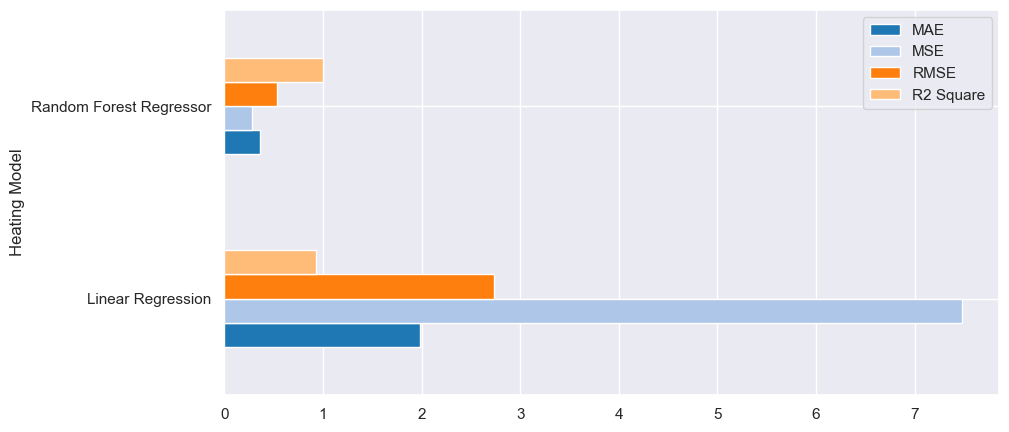

In [24]:
results_heat.plot(x='Heating Model',kind='barh', figsize=(10, 5))

<Axes: ylabel='Cooling Model'>

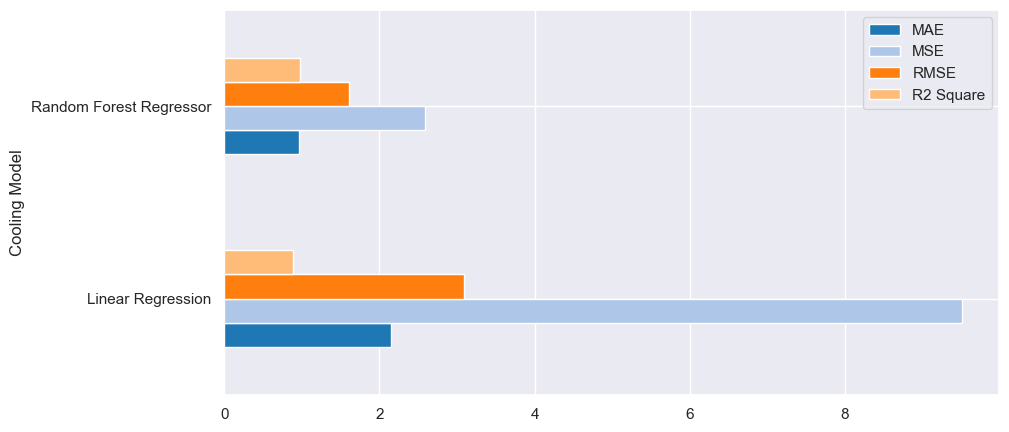

In [25]:
results_cool.plot(x='Cooling Model',kind='barh', figsize=(10, 5))